In [40]:
import datetime
import os

import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 200

# Random Forest Predictions
## Format Data

In [7]:
df = pd.read_csv('final_dataset_complete.csv', index_col=0)
# pull out labels
labels = df['results_|_AVG'] > 0

#drop results columns
drop_col = [col for col in list(df) if col.startswith('results')]
df.drop(drop_col, axis = 1, inplace=True)

# drop all % signs from dataframe
for col in [col for col in list(df) if col.endswith('%')]:
    df[col] = df[col].str.replace("%","").astype(float)
for col in [col for col in list(df) if col.endswith('HR/FB')]:
    df[col] = df[col].str.replace("%","").astype(float)

# drop all boolean values from df
# these were used to merge correct splits stats, and are not useful anymore
drop_col = [col for col in list(df) if df[col].dtypes == "bool"]
df.drop(drop_col, axis = 1, inplace=True)

# create useful variable from date
df.date = pd.to_datetime(df.date)
df['weekday'] = df.date.map(lambda x: x.weekday())
df['week_num'] = df.date.map(lambda x: x.isocalendar()[1])

# pull out identifiers
goodies =['p7_|_Name','date','matchup','opp_pitcher','opp_team','own_pitcher','team','team_fg','opp_team_fg']
identifiers = df[goodies]

# drop object fields
drop_col = [col for col in list(df) if df[col].dtypes == "O"]
df.drop(drop_col, axis = 1, inplace=True)
df.drop(['date'], axis = 1, inplace=True)

# drop season column
drop_col = [col for col in list(df) if col.endswith('Season')]
df.drop(drop_col, axis = 1, inplace=True)

# drop leftover index columns
drop_col = [col for col in list(df) if col.endswith('#')]
df.drop(drop_col, axis = 1, inplace=True)

In [8]:
df.shape

(112439, 195)

In [9]:
df.head()

,opp_team_bullpen_p7_|_IP,opp_team_bullpen_p7_|_TBF,opp_team_bullpen_p7_|_K/9,opp_team_bullpen_p7_|_BB/9,opp_team_bullpen_p7_|_K/BB,opp_team_bullpen_p7_|_HR/9,opp_team_bullpen_p7_|_K%,opp_team_bullpen_p7_|_BB%,opp_team_bullpen_p7_|_K-BB%,opp_team_bullpen_p7_|_AVG,opp_team_bullpen_p7_|_WHIP,opp_team_bullpen_p7_|_BABIP,opp_team_bullpen_p7_|_LOB%,opp_team_bullpen_p7_|_FIP,opp_team_bullpen_p7_|_xFIP,opp_team_bullpen_season_|_IP,opp_team_bullpen_season_|_TBF,opp_team_bullpen_season_|_K/9,opp_team_bullpen_season_|_BB/9,opp_team_bullpen_season_|_K/BB,opp_team_bullpen_season_|_HR/9,opp_team_bullpen_season_|_K%,opp_team_bullpen_season_|_BB%,opp_team_bullpen_season_|_K-BB%,opp_team_bullpen_season_|_AVG,opp_team_bullpen_season_|_WHIP,opp_team_bullpen_season_|_BABIP,opp_team_bullpen_season_|_LOB%,opp_team_bullpen_season_|_FIP,opp_team_bullpen_season_|_xFIP,opp_pitcher_battedballs_p3_|_IP,opp_pitcher_battedballs_p3_|_TBF,opp_pitcher_battedballs_p3_|_GB/FB,opp_pitcher_battedballs_p3_|_LD%,opp_pitcher_battedballs_p3_|_GB%,opp_pitcher_battedballs_p3_|_FB%,opp_pitcher_battedballs_p3_|_IFFB%,opp_pitcher_battedballs_p3_|_HR/FB,opp_pitcher_battedballs_p3_|_IFH%,opp_pitcher_battedballs_p3_|_BUH%,opp_pitcher_battedballs_p3_|_Pull%,opp_pitcher_battedballs_p3_|_Cent%,opp_pitcher_battedballs_p3_|_Oppo%,opp_pitcher_battedballs_p3_|_Soft%,opp_pitcher_battedballs_p3_|_Med%,opp_pitcher_battedballs_p3_|_Hard%,opp_pitcher_battedballs_season_|_IP,opp_pitcher_battedballs_season_|_TBF,opp_pitcher_battedballs_season_|_GB/FB,opp_pitcher_battedballs_season_|_LD%,opp_pitcher_battedballs_season_|_GB%,opp_pitcher_battedballs_season_|_FB%,opp_pitcher_battedballs_season_|_IFFB%,opp_pitcher_battedballs_season_|_HR/FB,opp_pitcher_battedballs_season_|_IFH%,opp_pitcher_battedballs_season_|_BUH%,opp_pitcher_battedballs_season_|_Pull%,opp_pitcher_battedballs_season_|_Cent%,opp_pitcher_battedballs_season_|_Oppo%,opp_pitcher_battedballs_season_|_Soft%,opp_pitcher_battedballs_season_|_Med%,opp_pitcher_battedballs_season_|_Hard%,opp_pitcher_p3_|_IP,opp_pitcher_p3_|_TBF,opp_pitcher_p3_|_K/9,opp_pitcher_p3_|_BB/9,opp_pitcher_p3_|_K/BB,opp_pitcher_p3_|_HR/9,opp_pitcher_p3_|_K%,opp_pitcher_p3_|_BB%,opp_pitcher_p3_|_K-BB%,opp_pitcher_p3_|_AVG,opp_pitcher_p3_|_WHIP,opp_pitcher_p3_|_BABIP,opp_pitcher_p3_|_LOB%,opp_pitcher_p3_|_FIP,opp_pitcher_p3_|_xFIP,opp_pitcher_season_|_IP,opp_pitcher_season_|_TBF,opp_pitcher_season_|_K/9,opp_pitcher_season_|_BB/9,opp_pitcher_season_|_K/BB,opp_pitcher_season_|_HR/9,opp_pitcher_season_|_K%,opp_pitcher_season_|_BB%,opp_pitcher_season_|_K-BB%,opp_pitcher_season_|_AVG,opp_pitcher_season_|_WHIP,opp_pitcher_season_|_BABIP,opp_pitcher_season_|_LOB%,opp_pitcher_season_|_FIP,opp_pitcher_season_|_xFIP,team_p7_|_PA,team_p7_|_BB%,team_p7_|_K%,team_p7_|_BB/K,team_p7_|_AVG,team_p7_|_OBP,team_p7_|_SLG,team_p7_|_OPS,team_p7_|_ISO,team_p7_|_BABIP,team_p7_|_wRC,team_p7_|_wRAA,team_p7_|_wOBA,team_p7_|_wRC+,opp_team_p7_|_PA,opp_team_p7_|_BB%,opp_team_p7_|_K%,opp_team_p7_|_BB/K,opp_team_p7_|_AVG,opp_team_p7_|_OBP,opp_team_p7_|_SLG,opp_team_p7_|_OPS,opp_team_p7_|_ISO,opp_team_p7_|_BABIP,opp_team_p7_|_wRC,opp_team_p7_|_wRAA,opp_team_p7_|_wOBA,opp_team_p7_|_wRC+,battedballs_p7_|_PA,battedballs_p7_|_GB/FB,battedballs_p7_|_LD%,battedballs_p7_|_GB%,battedballs_p7_|_FB%,battedballs_p7_|_IFFB%,battedballs_p7_|_HR/FB,battedballs_p7_|_IFH%,battedballs_p7_|_BUH%,battedballs_p7_|_Pull%,battedballs_p7_|_Cent%,battedballs_p7_|_Oppo%,battedballs_p7_|_Soft%,battedballs_p7_|_Med%,battedballs_p7_|_Hard%,battedballs_season_|_PA,battedballs_season_|_GB/FB,battedballs_season_|_LD%,battedballs_season_|_GB%,battedballs_season_|_FB%,battedballs_season_|_IFFB%,battedballs_season_|_HR/FB,battedballs_season_|_IFH%,battedballs_season_|_BUH%,battedballs_season_|_Pull%,battedballs_season_|_Cent%,battedballs_season_|_Oppo%,battedballs_season_|_Soft%,battedballs_season_|_Med%,battedballs_season_|_Hard%,p7_|_PA,p7_|_GB/FB,p7_|_LD%,p7_|_GB%,p7_|_FB%,p7_|_IFFB%,p7_|_HR/FB,p7_|_IFH%,p7_|_BUH%,p7_|_Pull%,

## Split Set

In [129]:
s1 = int(len(df) * .6)
s2 = int(len(df) * .9)
X,Y,Z = shuffle(df, labels, identifiers)
X_train, Y_train, Z_train = X[:s1], Y[:s1], Z[:s1]
X_dev, Y_dev, Z_dev = X[s1:s2], Y[s1:s2], Z[s1:s2]
X_test, Y_test, Z_test = X[s2:], Y[s2:], Z[s2:]

In [131]:
l1 = LogisticRegression()
l1.fit(X_train, Y_train)
print(metrics.classification_report(y_true=Y_dev, y_pred=l1.predict(X_dev)))

             precision    recall  f1-score   support

      False       0.60      0.33      0.43     12838
       True       0.63      0.83      0.71     17162

avg / total       0.61      0.62      0.59     30000



In [135]:
probs = l1.predict_proba(X_dev)[:,1]
thresh = np.percentile(probs, 95)
print(metrics.classification_report(y_pred=(probs >= thresh), y_true=Y_dev, digits = 3))

             precision    recall  f1-score   support

      False      0.435     0.966     0.600     12838
       True      0.712     0.062     0.114     17162

avg / total      0.594     0.449     0.322     30000



## Model

In [118]:
def mini_grid_search(model, param, values, thresholds = [50, 60 , 70, 80, 90, 95, 97]):
    """Performs gridsearch on one paramater using precision
    Args:
        model: sklearn model
        param: parameter string
        values: list of paramater values to interate over
        thresholds: list of cutoff points to compare
    Returns:
        dataframe with precision scores based on thresholds
    """
    output = []
    for value in values:
        model.set_params(**{param: value})
        model.fit(X_train, Y_train)
        probs = model.predict_proba(X_dev)[:,1]
        for threshold in thresholds:
            t = np.percentile(probs, threshold)
            score = metrics.precision_score(y_pred=probs >= t, y_true=Y_dev)
            output.append({'param_value': value, 'threshold': threshold, 'precision': score})
    return pd.DataFrame(output)  

## Grid Search
Be very intentional with grid search and look at one parameter at a time
### Min Sample Split
Hard to pin down a best value. There is a ton of seemingly random variation

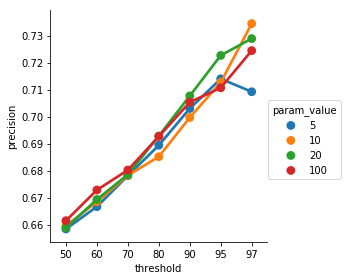

In [136]:
rfc = RandomForestClassifier(n_estimators=200)
df_gs = mini_grid_search(rfc, 'min_samples_split', values = [100, 20, 10, 5])
sns.factorplot(data=df_gs, y='precision', x = 'threshold', hue='param_value')

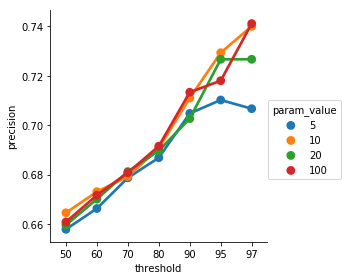

In [137]:
rfc = RandomForestClassifier(n_estimators=200)
df_gs = mini_grid_search(rfc, 'min_samples_split', values = [100, 20, 10, 5])
sns.factorplot(data=df_gs, y='precision', x = 'threshold', hue='param_value')

### max_features

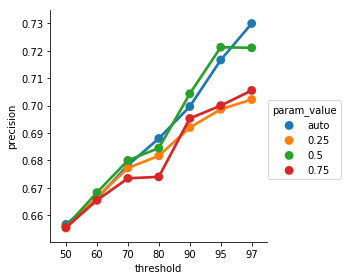

In [138]:
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=15)
df_gs = mini_grid_search(rfc, 'max_features', values = ['auto', .25, .5, .75])
sns.factorplot(data=df_gs, y='precision', x = 'threshold', hue='param_value')

In [116]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [115]:
rfc.set_params(**{'min_samples_split': 10})

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [110]:
np.linspace(.5,.9, 5)

array([ 0.5,  0.6,  0.7,  0.8,  0.9])

In [96]:
rfc.set_params?

In [94]:
probs = rfc.predict_proba(X_dev)[:,1]
thresh = np.percentile(probs, 97)
print(metrics.classification_report(y_pred=(probs >= thresh), y_true=Y_dev))

             precision    recall  f1-score   support

      False       0.43      0.98      0.59      4216
       True       0.74      0.04      0.07      5784

avg / total       0.61      0.44      0.29     10000



In [34]:
probs = rfc.predict_proba(X_dev)[:,1]

In [35]:
thresh = np.percentile(probs, 97)

In [38]:
thresh

0.74274431980710942

In [39]:
print(metrics.classification_report(y_pred=(probs >= thresh), y_true=Y_dev))

             precision    recall  f1-score   support

      False       0.43      0.98      0.59      4216
       True       0.74      0.04      0.07      5784

avg / total       0.61      0.44      0.29     10000



In [17]:
metrics.precision_score(y_pred=rfc.predict(X_dev), y_true=Y_dev)

0.63355006501950584